In [369]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [370]:
data=pd.read_csv("(Dataset)IIIT Pune Student Mood in the era of Online Learning.csv")

In [371]:
data["PHQ-9 Score"]=0
for x in data.columns[24:33]:
    data["PHQ-9 Score"]+=data[x]-1

data["GAD-7 Score"]=0
for x in data.columns[17:24]:
    data["GAD-7 Score"]+=data[x]-1

In [372]:
data["Depression Severity"]=""
c=0
for x in data["PHQ-9 Score"]:
    if x>19 :
        data["Depression Severity"][c]="Severe"
    elif x>14:
        data["Depression Severity"][c]="Moderately Severe"
    elif x>9:
        data["Depression Severity"][c]="Moderate"
    elif x>4:
        data["Depression Severity"][c]="Mild"
    else :
        data["Depression Severity"][c]="None-minimal"
    c+=1

In [373]:
data["Anxiety Severity"]=""
c=0
for x in data["GAD-7 Score"]:
    if x>14:
        data["Anxiety Severity"][c]="Severe"
    elif x>9:
        data["Anxiety Severity"][c]="Moderate"
    elif x>4:
        data["Anxiety Severity"][c]="Mild"
    else :
        data["Anxiety Severity"][c]="Minimal"
    c+=1

In [374]:
c=0
for x in data.columns:
    print(c,":",data[x].dtypes,":",x)
    c+=1

0 : object : Timestamp
1 : object : Choose your course type.
2 : object : Which year BTech student are you ?
3 : object : Which year MTech student are you?
4 : object : Which branch are you enrolled in ?
5 : object : What is your gender ?
6 : int64 : What is your age ? ( in years)
7 : object : Did you have to frequently change school in your schooldays ?
8 : object : Do you live in a rented accommodation ?
9 : float64 : Provide your height in cms . (only number)
10 : float64 : Provide your weight in Kgs .(only number)
11 : int64 : How many siblings are you in total ? (including you)
12 : object : Do you live with a single parent/guardian ?
13 : object : Do both of your parents work ?
14 : object : Do you smoke ?
15 : object : Are you specially abled ?
16 : object : Have you ever been constantly bullied by someone ?
17 : int64 : 1. Feeling nervous, anxious or on edge .
18 : int64 : 2. Not being able to stop or control worrying .
19 : int64 : 3.Worrying too much about different things .


In [375]:
data.drop("Timestamp",axis=1,inplace=True)

In [376]:
valid_participants=len(data.index)

In [377]:
valid_participants=0
def absolute_num(x):
    global valid_participants
    return "{:.1f}% ({})".format(x,round(x*valid_participants/100))

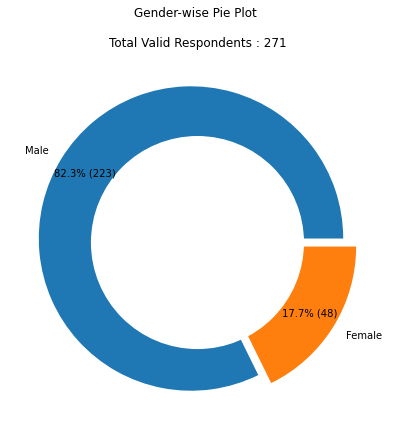

In [378]:
fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(data["What is your gender ?"])

plt.pie(data["What is your gender ?"].value_counts(),labels=["Male","Female"],autopct=absolute_num,startangle=0,pctdistance=0.82,explode=(0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Gender-wise Pie Plot \n\nTotal Valid Respondents : "+str(valid_participants))
plt.show()

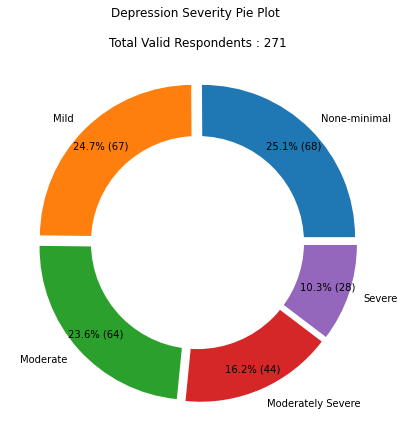

In [379]:
fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(data["Depression Severity"])

plt.pie(data["Depression Severity"].value_counts(),labels=["None-minimal","Mild","Moderate","Moderately Severe","Severe"],autopct=absolute_num,startangle=0,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Depression Severity Pie Plot \n\nTotal Valid Respondents : "+str(valid_participants))
plt.show()

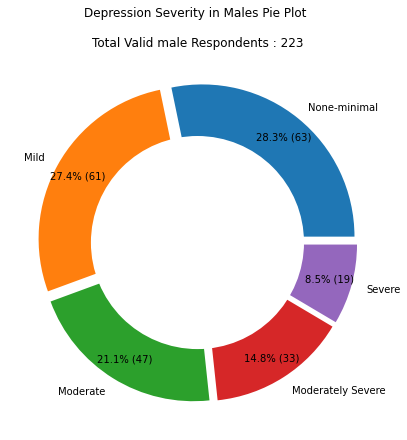

In [380]:
datam=data[data["What is your gender ?"]=="Male"]["Depression Severity"]

fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(datam)

plt.pie(datam.value_counts(),labels=["None-minimal","Mild","Moderate","Moderately Severe","Severe"],autopct=absolute_num,startangle=0,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Depression Severity in Males Pie Plot \n\nTotal Valid male Respondents : "+str(valid_participants))
plt.show()

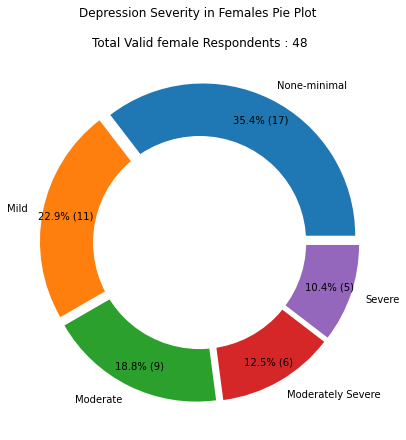

In [381]:
dataf=data[data["What is your gender ?"]=="Female"]["Depression Severity"]

fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(dataf)

plt.pie(dataf.value_counts(),labels=["None-minimal","Mild","Moderate","Moderately Severe","Severe"],autopct=absolute_num,startangle=0,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Depression Severity in Females Pie Plot \n\nTotal Valid female Respondents : "+str(valid_participants))
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(data["Depression Severity"])

plt.pie(data["Depression Severity"].value_counts(),labels=["None-minimal","Mild","Moderate","Moderately Severe","Severe"],autopct=absolute_num,startangle=0,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Depression Severity Pie Plot \n\nTotal Valid Respondents : "+str(valid_participants))
plt.show()

In [382]:
data["PHQ-9 Score"].describe()

count    271.000000
mean      10.092251
std        6.703977
min        0.000000
25%        4.500000
50%       10.000000
75%       15.000000
max       27.000000
Name: PHQ-9 Score, dtype: float64

In [383]:
data["PHQ-9 Score"].value_counts().sort_index()

0     14
1      8
2     12
3     19
4     15
5     10
6     17
7     11
8     13
9     16
10    17
11    19
12     8
13    16
14     4
15    18
16     7
17     5
18    12
19     2
20     6
21     2
22     5
23     2
24     4
25     2
26     4
27     3
Name: PHQ-9 Score, dtype: int64

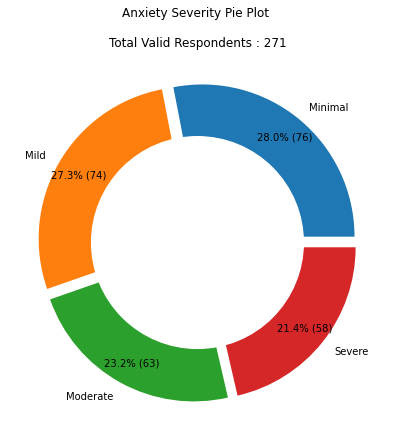

In [384]:
fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(data["Anxiety Severity"])

plt.pie(data["Anxiety Severity"].value_counts(),labels=["Minimal","Mild","Moderate","Severe"],autopct=absolute_num,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Anxiety Severity Pie Plot \n\nTotal Valid Respondents : "+str(valid_participants))
plt.show()

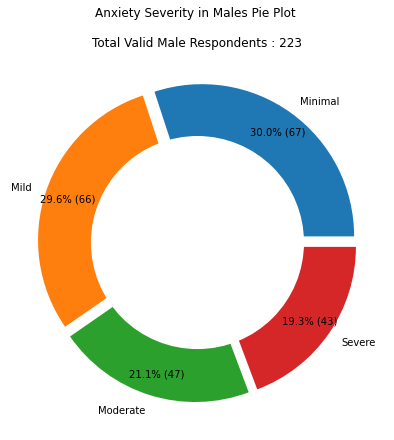

In [385]:
datam=data[data["What is your gender ?"]=="Male"]["Anxiety Severity"]

fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(datam)

plt.pie(datam.value_counts(),labels=["Minimal","Mild","Moderate","Severe"],autopct=absolute_num,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Anxiety Severity in Males Pie Plot \n\nTotal Valid Male Respondents : "+str(valid_participants))
plt.show()

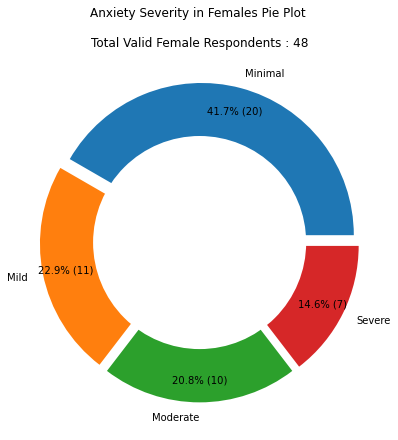

In [386]:
dataf=data[data["What is your gender ?"]=="Female"]["Anxiety Severity"]

fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(dataf)

plt.pie(dataf.value_counts(),labels=["Minimal","Mild","Moderate","Severe"],autopct=absolute_num,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Anxiety Severity in Females Pie Plot \n\nTotal Valid Female Respondents : "+str(valid_participants))
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7)) 

valid_participants=len(data["Anxiety Severity"])

plt.pie(data["Anxiety Severity"].value_counts(),labels=["Minimal","Mild","Moderate","Severe"],autopct=absolute_num,pctdistance=0.85,explode=(0.05,0.05,0.05,0.05))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Anxiety Severity Pie Plot \n\nTotal Valid Respondents : "+str(valid_participants))
plt.show()

In [387]:
data["GAD-7 Score"].describe()

count    271.000000
mean       9.250923
std        6.171901
min        0.000000
25%        4.000000
50%        8.000000
75%       14.000000
max       21.000000
Name: GAD-7 Score, dtype: float64

In [388]:
data["GAD-7 Score"].value_counts().sort_index()

0     16
1     15
2     12
3     13
4     18
5     17
6     11
7     16
8     20
9     12
10    11
11    13
12    17
13    10
14     7
15    10
16     7
17    14
18     5
19     5
20     6
21    16
Name: GAD-7 Score, dtype: int64

In [389]:
ord_cols=[x for x in data.columns if data[x].dtypes==object ]

In [390]:
dh=data[ord_cols].replace({"Yes":1,"No":0,"First Year":1,"Second Year":2,"Third Year":3,"Fourth Year":4,"Male":1,"Female":0,"BTech":0,"MTech":1,"Computer Science and Engineering":0,"Electronics Communication and Engineering":1,"Others":2})

In [391]:
dh=dh.fillna(0)

In [392]:
dh["Which year since starting BTech ?"]=dh["Which year MTech student are you?"]+dh["Which year BTech student are you ?"]

In [393]:
#dh=dh.drop(["Which year MTech student are you?","Which year BTech student are you ?"],axis=1)

In [394]:
sf=[x for x in data.columns if x not in ord_cols]
data=pd.concat([data[sf],dh],axis=1)

In [395]:
ord_cols=[x for x in data.columns if data[x].dtypes==object]

In [396]:
ordEnc=OrdinalEncoder()
data_ord_enc=ordEnc.fit_transform(data[ord_cols])
df=pd.DataFrame(data_ord_enc)
df.columns=ord_cols
ndata=pd.concat([data,df],axis=1)

In [398]:
cm=ndata.corr()
acm=cm.copy()

Text(0.5, 1.0, 'Correlation Heatmap')

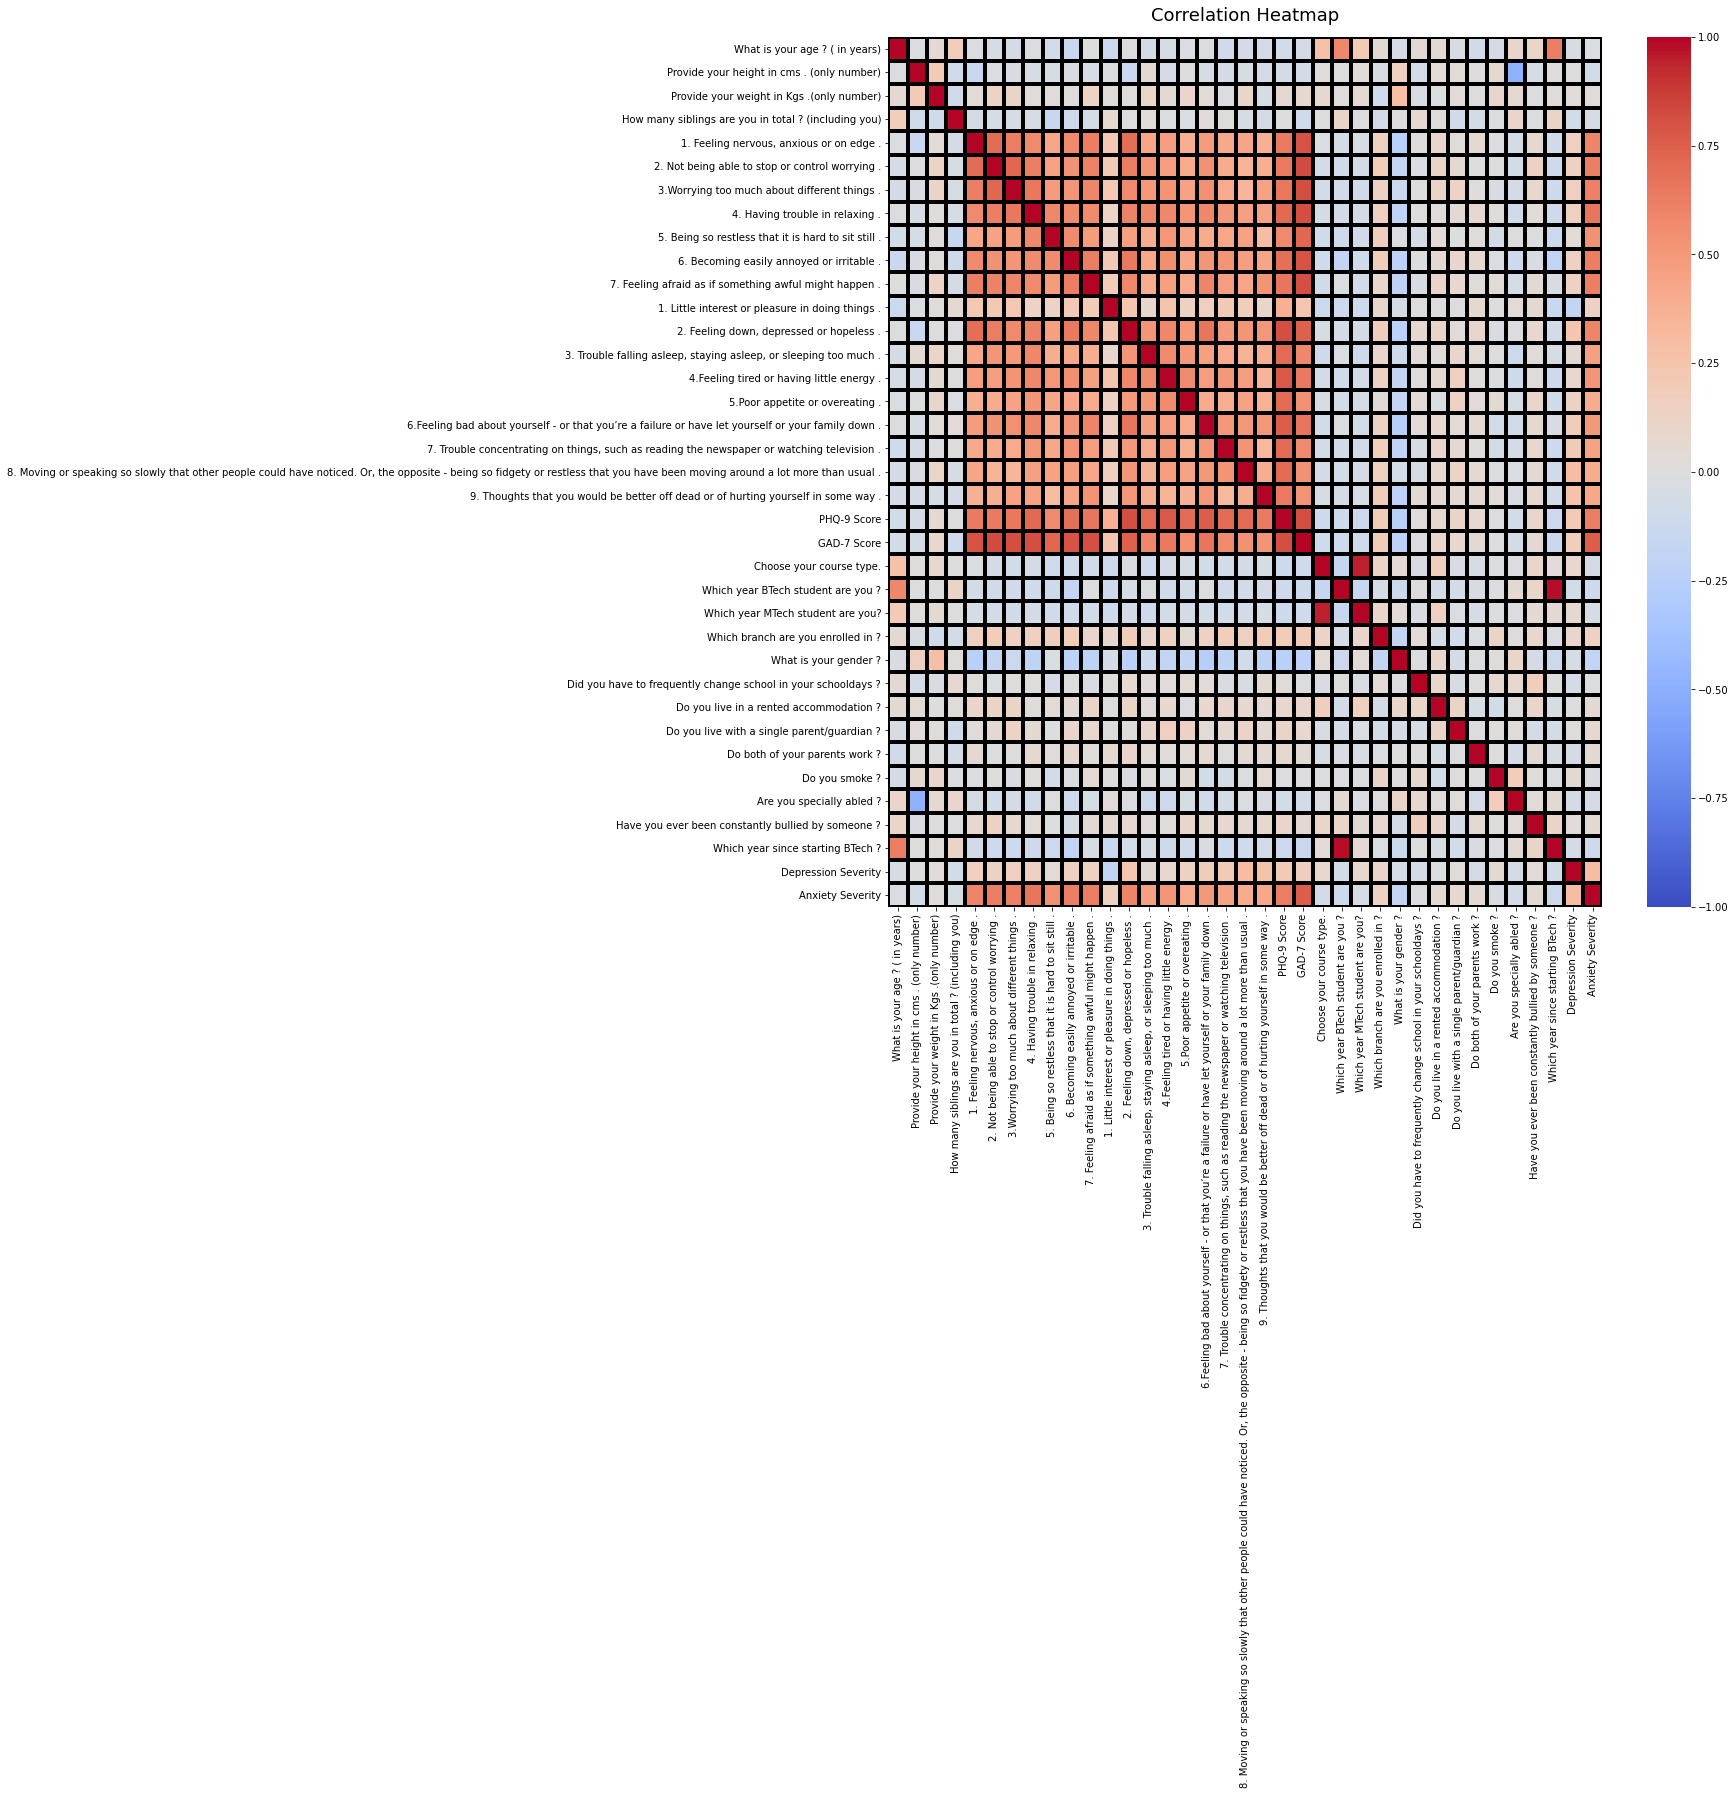

In [399]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(cm,cmap= 'coolwarm',vmin=-1,vmax=1,center=0, linewidths=3, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [400]:
cm["PHQ-9 Score"].sort_values()[-10:]

5.Poor appetite or overeating .                                                                                                                                                   0.700631
3. Trouble falling asleep, staying asleep, or sleeping too much .                                                                                                                 0.703716
7. Trouble concentrating on things, such as reading the newspaper or watching television .                                                                                        0.708478
8. Moving or speaking so slowly that other people could have noticed. Or, the opposite - being so fidgety or restless that you have been moving around a lot more than usual .    0.709462
4. Having trouble in relaxing .                                                                                                                                                   0.716851
6.Feeling bad about yourself - or that you’re a failure or have l

In [401]:
cm["GAD-7 Score"].sort_values()[-10:]

2. Feeling down, depressed or hopeless .                  0.747236
Anxiety Severity                                          0.765076
6. Becoming easily annoyed or irritable .                 0.791207
1. Feeling nervous, anxious or on edge .                  0.804399
7. Feeling afraid as if something awful might happen .    0.808494
PHQ-9 Score                                               0.816063
4. Having trouble in relaxing .                           0.818009
3.Worrying too much about different things .              0.818956
2. Not being able to stop or control worrying .           0.826091
GAD-7 Score                                               1.000000
Name: GAD-7 Score, dtype: float64

In [402]:
for x in cm:
    for y in cm:
        acm.at[x,y]=abs(cm.at[x,y])

Text(0.5, 1.0, 'Correlation Heatmap')

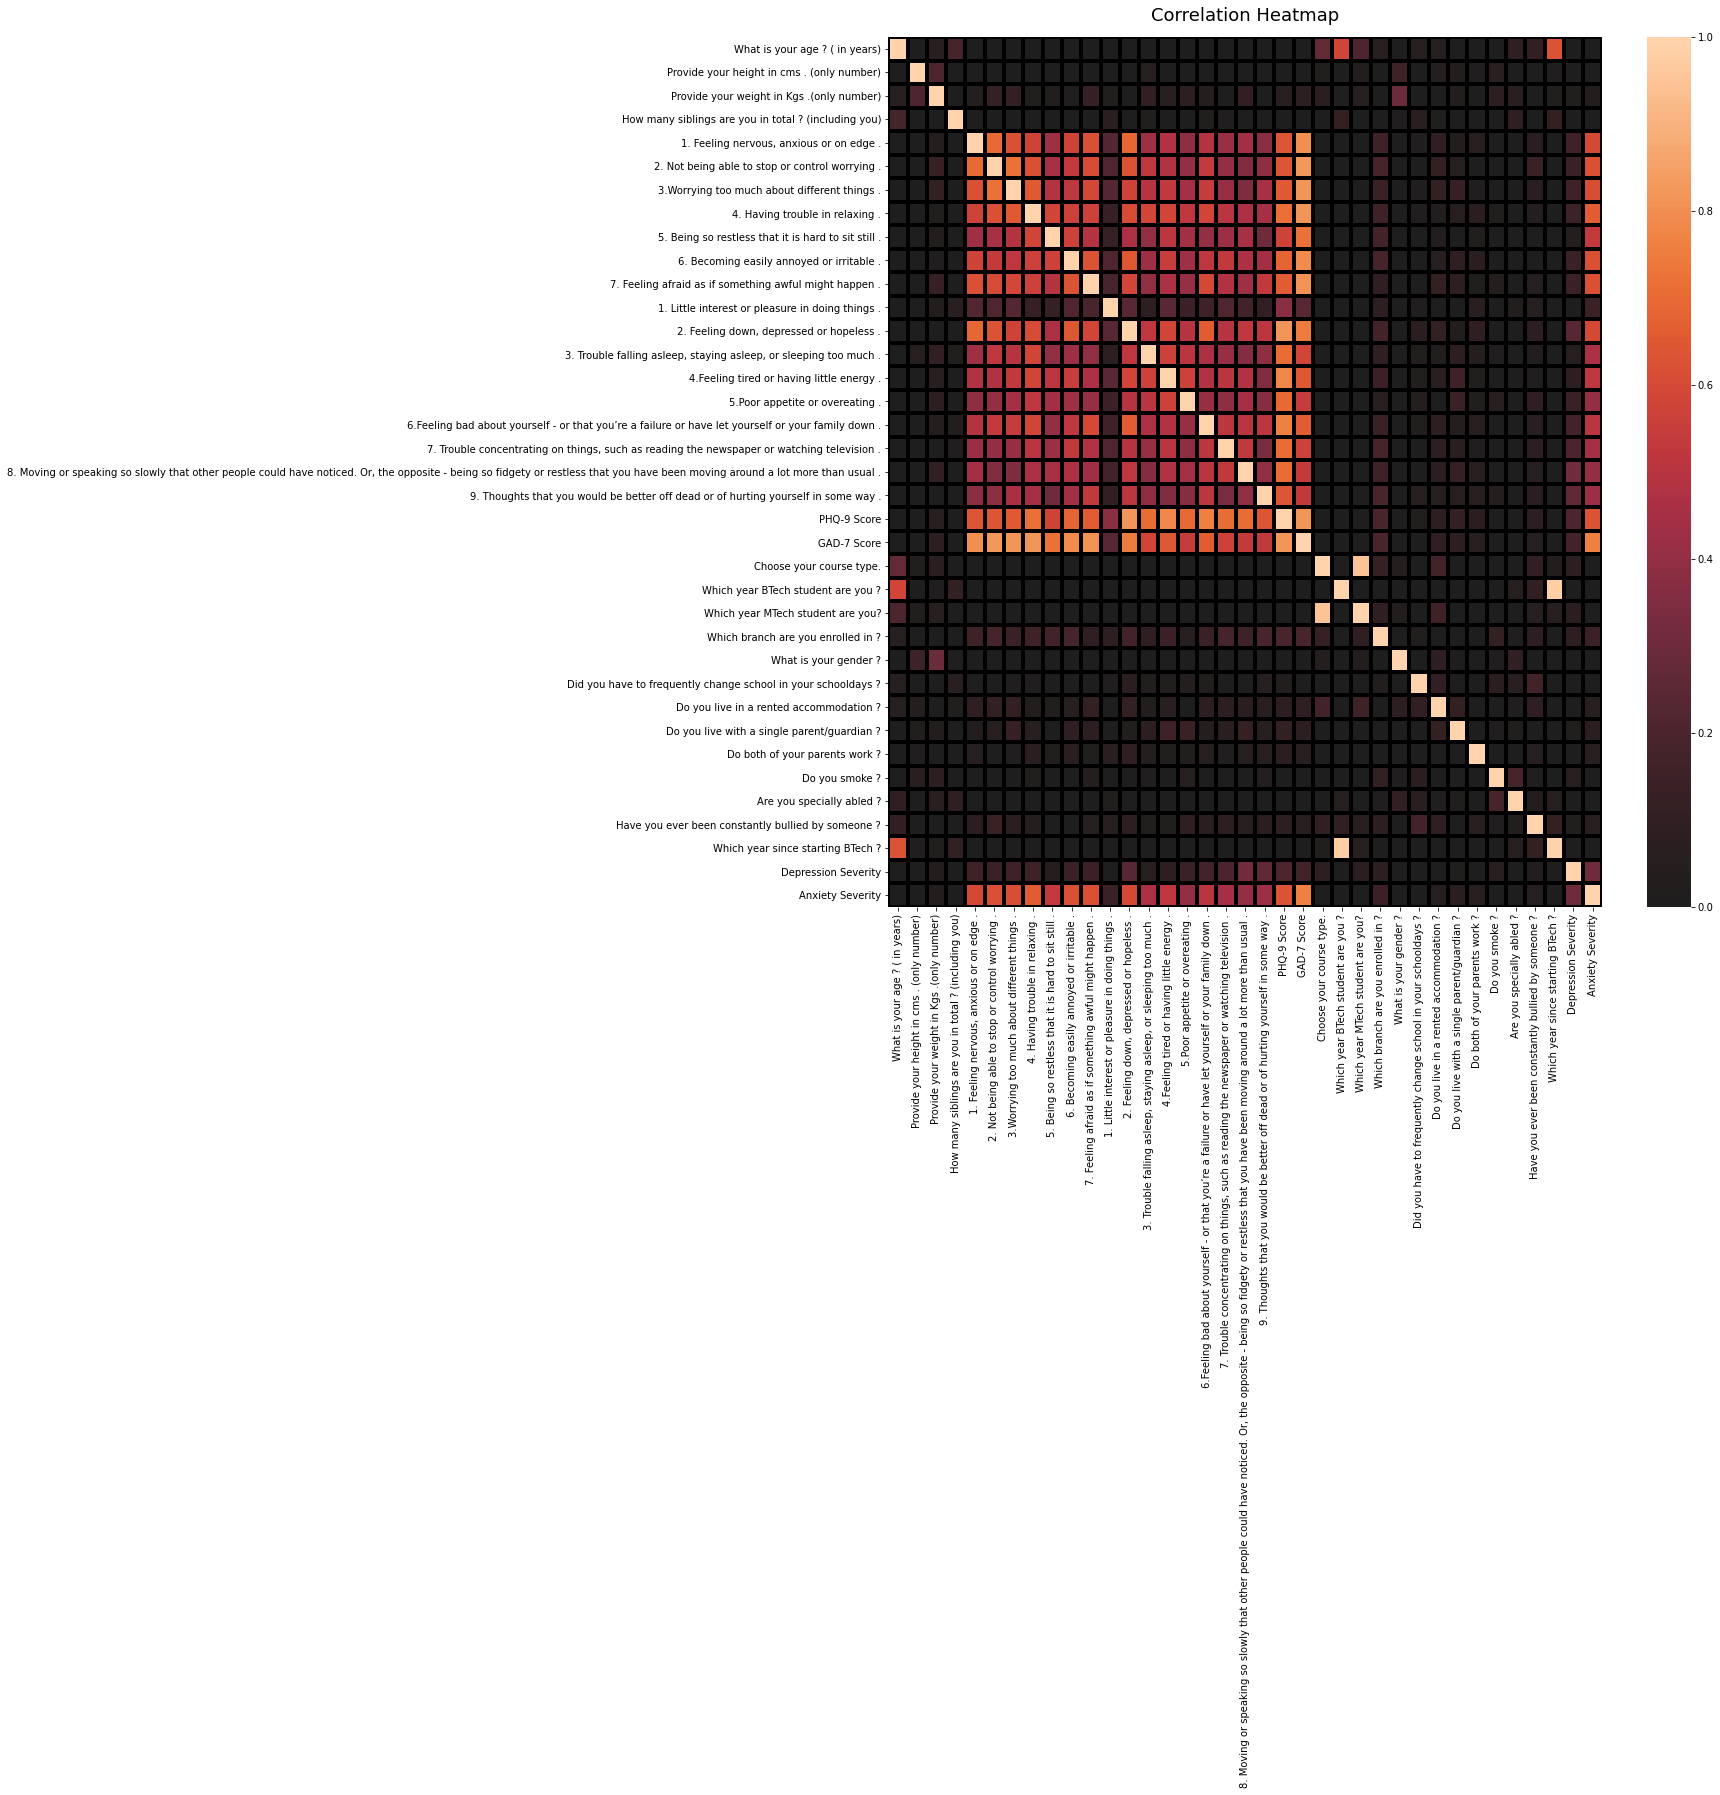

In [403]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(cm,vmin=0,vmax=1,center=0, linewidths=3, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [404]:
acm["PHQ-9 Score"].sort_values()[-9:]

3. Trouble falling asleep, staying asleep, or sleeping too much .                                                                                                                 0.703716
7. Trouble concentrating on things, such as reading the newspaper or watching television .                                                                                        0.708478
8. Moving or speaking so slowly that other people could have noticed. Or, the opposite - being so fidgety or restless that you have been moving around a lot more than usual .    0.709462
4. Having trouble in relaxing .                                                                                                                                                   0.716851
6.Feeling bad about yourself - or that you’re a failure or have let yourself or your family down .                                                                                0.764715
4.Feeling tired or having little energy .                        

In [405]:
acm["GAD-7 Score"].sort_values()[-8:]

6. Becoming easily annoyed or irritable .                 0.791207
1. Feeling nervous, anxious or on edge .                  0.804399
7. Feeling afraid as if something awful might happen .    0.808494
PHQ-9 Score                                               0.816063
4. Having trouble in relaxing .                           0.818009
3.Worrying too much about different things .              0.818956
2. Not being able to stop or control worrying .           0.826091
GAD-7 Score                                               1.000000
Name: GAD-7 Score, dtype: float64